<center>
 
### ANLY 590 | Homework 1
### Kendra Gedney | kg729@georgetown.edu 

<center>

***

In [1]:
# set working directory
import os
path = '/Users/kgedney/Documents/georgetown/anly590/anly590-homework'
os.chdir(path)

In [2]:
# prep 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from __future__ import division

### Problem 1: Feedforward: Building a ReLu 2 Layer neural network


** 1) Plot (draw) a network with: **
 - **2 inputs,**   
 - ** 2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a **
 - **3-class output (use a `softmax` function) **

_Diagram below:_

![2 Layer Network Diagram](IMG_9989.JPG)

**2) Write out the mathematical equation for this network**

_First, we define the parts of the network:_ 

* _ We denote the input matrix as a_ `(num_obs, 2)` _matrix:_ $X = [x_1, x_2]$  _and the output matrix as $Y =  [y_1, y_2, y_3]$_
* _`(2, 3)` Weight matrix into the first hidden layer as:   ${W^{(1)}}$_      
* _`(3, 2)` Weight matrix into the second hidden layer as:   ${W^{(2)}}$_ .    
* _`(2, 3)` Weight matrix into the output layer as: $V$_    
* _Biases into each layer as: $b^{(1)}, b^{(2)}, c$_    
* _The ReLu activation function as: $relu(z)$, such that $relu(z) = max(0, z)$._  

_Then, the equation for this network can then be written as:_

$h_1= relu(X * {W^{(1)}} + b^1)$   
$h_2 = relu(h_1 * {W^{(2)}} + b^2)$   
$Y = softmax(h_2 * V + c)$   

_Nested together, we have:_  

$Y = softmax(relu(relu(X * {W^{(1)}} + b^1) * {W^{(2)}} + b^2) * V + c)$


**3) Write out the function in python, call it `ff_nn_2_ReLu(...)`**

In [3]:
def ReLu(x):
    return np.maximum(x,0)

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)

def ff_nn_2_ReLu(x, w1, w2, v, b1, b2, c):
    '''
    A 2 layer neural network with ReLu activation and 3-class output.
    '''
    
    a1 = np.dot(x, w1) + b1
    h1 = ReLu(a1)
    
    a2 = np.dot(h1, w2) + b2
    h2 = ReLu(a2)
    
    y = softmax(np.dot(h2, v) + c)

    return np.array(y)

**4) Suppose you have the following set of weight matrices and inputs, what are the class probabilities associated with the forward pass of each sample?**

_The resulting class probabilities are:_

_Sample 1:  94.7%, 4.7%,  0.6%_   
_Sample 2:  84.4%, 11.4%, 4.2%_   
_Sample 3:  84.4%, 11.4%, 4.2%_   

In [4]:
# create weight matrices and inputs

# set input matrix
x = np.array([[1, 0, 0], [-1, -1, 1]]).T

# set weights
w1 = np.array([[1, 0], [-1, 0], [0, 0.5]]).T
w2 = np.array([[1, 0, 0], [-1, -1, 0]]).T
v  = np.array([[1, 1], [0, 0], [-1, -1]]).T

# define bias variables
b1 = np.array([[0, 0, 1]])
b2 = np.array([[1, -1]])
c  = np.array([[1, 0, 0]])

In [5]:
ff_nn_2_ReLu(x, w1, w2, v, b1, b2, c)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

### Problem 2:  Gradient Descent
**The Rosenbrock function is a famous non-convex function that is used to explore optimization algorithms. This simple 2-D function has some very tricky structure. **   

$f(x, y) = (1-x)^2 + 100 (y-x^2)^2$  

**1) What are the partial derivatives of f with respect to x and to y?**

_First, we expand the function such that we have:_

$f(x,y)=1 - 2x + x^2 + 100y^2 - 200x^2y + 100x^4$

_Then we can solve for the partials:_

$\frac{\partial f}{\partial x} = -2 + 2x -400xy + 400x^3 = 400x^3 - 400xy + 2x - 2$
     
   
$\frac{\partial f}{\partial y} = 200y - 200x^2 = -200x^2 + 200y$


**2) Create a visualization of the contours of the Rosenbrock function.**

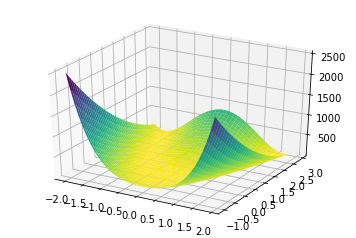

In [6]:
# generate data
delta = 0.1
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

# rosenbrock
Z = ((1 - X)**2) + (100 * ((Y - X**2)**2))

# plot 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis_r')
plt.show()

**3) Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.**

_First, we define functions to compute the value of the Rosenbrock function, its gradient, and to run the gradient descent algorithm._

In [7]:
# compute rosenbrock value
def rosenbrock(point):
    x, y = point[0], point[1]
    return (1 - x)**2 +100 * (y - x**2)**2

# compute gradient of rosenbrock at given point
def grad_r(vector):
    x, y = vector
    df_dx = (-2) + (2*x) -(400*x*y) + (400*(x**3))
    df_dy = (200*y) - (200*(x**2))
    return np.array([df_dx, df_dy])

# compute gradient descent
def grad_descent(point, iterations=10, learning_rate=0.01):
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_r(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

_Next, we run tests with different learning rates._ 

_ -  With a high learning rate (rate = 0.01), the algorithm does not work, as it continues to guess too high and it overflows with such large values._

_ -  With a smaller learning rate (rate = 0.0001), the algorithm does better, ending at a local mininum of 38.6._

_ -  With an even smaller learing rate (rate = 0.00001), the algorithm doesn't do as well, the steps are too small, ending at a value of 1462._ 

38.63180871186455 1462.769826082764


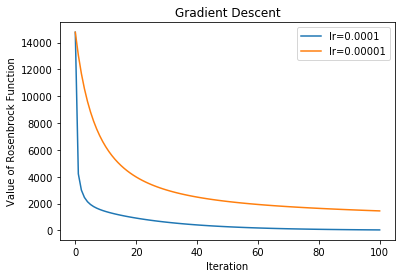

In [8]:
np.random.seed(10)
starting_point = np.random.uniform(-5, 5, size=2)

traj_a = grad_descent(starting_point, iterations=100, learning_rate=0.0001)
cost_a = [rosenbrock(point) for point in traj_a]

traj_b = grad_descent(starting_point, iterations=100, learning_rate=0.00001)
cost_b = [rosenbrock(point) for point in traj_b]

print(cost_a[99], cost_b[99])

plt.plot(cost_a, label='lr=0.0001')
plt.plot(cost_b, label='lr=0.00001')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Value of Rosenbrock Function')
plt.title('Gradient Descent')
plt.show()

**4) Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.**

- _Using momentum, the algorithm is much more efficient._
- _With a momentum alpha value of 0.55, in combination with the 0.0001 learning rate, the algorithm reaches a minimum of 1.092, in the same number of iterations as above._

In [9]:
# alpha is the momentum parameter 
def grad_descent_with_momentum(point, iterations=10, alpha=.9, epsilon=0.1):    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_r(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

1.0980585685734228 1.7625436812868178


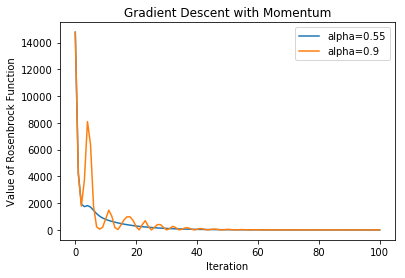

In [10]:
np.random.seed(10)
starting_point = np.random.uniform(-5, 5, size=2)

traj_a = grad_descent_with_momentum(starting_point, iterations=100, alpha=0.55, epsilon=0.0001)
cost_a = [rosenbrock(point) for point in traj_a]

traj_b = grad_descent_with_momentum(starting_point, iterations=100, alpha=0.9, epsilon=0.0001)
cost_b = [rosenbrock(point) for point in traj_b]

print(cost_a[99], cost_b[99])

plt.plot(cost_a, label='alpha=0.55')
plt.plot(cost_b, label='alpha=0.9')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Value of Rosenbrock Function')
plt.title('Gradient Descent with Momentum')
plt.show()

### Problem 3: Backprop

**1) For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.**

_Since this is a multiclass (3-class) classification problem, we use cross entropy as the Loss function with softmax on the last layer, and we'll use ReLU as the activiation function throughout. The model has 26 free parameters (3 sets of biases, 3 sets of weights). We will derive expressions of for the gradients of each using matrix notation._ 

_A few definitions, using the notation from Nielsen (http://neuralnetworksanddeeplearning.com/chap2.html)..._

* _Input matrix $x$, which is a_ `(num_obs, 2)` _matrix._
* _$L$ as index for the last layer, which in our case is 3._
* _ Weight matrices:_ ${W^{(1)}}, {W^{(2)}}, V$, _of shapes 2x3, 3x2, 2x3 respectively._ 
* _Biases into each layer as:_ $b^{(1)}, b^{(2)}, c$, _of shapes 1x3, 1x2, 1x3 respectively._

* _Matrices:_ $z^1, z^2$ _as the input going into the activation functions at each layer, including the biases._ $z^3$ or $z^L$ _as the input going into the softmax._   
* _Matrices:_ $a^1, a^2$ _as the output going out of the activation functions at each layer (same as $h_1, h_2$ in #1)_
* $\hat{y}$ is the output of the network (equal to $a^3$)
* That is:   
$z_l = W^l * a^{l-1} + b^l$   
$a_l = activation(z_l)$   
 

* $\delta^l_j$ _as the error term of neuron_ $j$ _in layer_ $l$

* $\sigma(x) ; \sigma'(x)$ _as the ReLU activation and its derivative._

  

_Since we have the special case of cross-entropy loss with a softmax, as in (https://deepnotes.io/softmax-crossentropy), we know that_ $\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z^3}  = \hat{y} - y$.


1) $\frac{\partial L}{\partial c} = \delta_L = \nabla_a L \odot \sigma'(z^3)$. _Which is equivalent to our case above so we have:_ $\frac{\partial L}{\partial c} = \hat{y} - y$


2) $\frac{\partial L}{\partial b^2} = \delta_2 = ((w^3)^T \delta_3) \odot \sigma'(z^2) = (V^T(\hat{y} - y) \odot \sigma'(z^2)$.


3) $\frac{\partial L}{\partial b^1} = \delta_1 = ((w^2)^T \delta_2) \odot \sigma'(z^1).$ _Plugging in for_ $\delta_2$ _we have:_ $ = ((W^2)^T (V^T(\hat{y} - y) \odot \sigma'(z^2)) \odot \sigma'(z^1)$


4) $\frac{\partial L}{\partial V} = a^2 \delta_3 = a^2 (\hat{y} - y$).


5) $\frac{\partial L}{\partial W^2} = a^1 \delta_2 = a^1 ((V^T(\hat{y} - y) \odot \sigma'(z^2))$.


6) $\frac{\partial L}{\partial W^1} = a^0 \delta_1 = x \delta_1 = x (((W^2)^T (V^T(\hat{y} - y) \odot \sigma'(z^2)) \odot \sigma'(z^1))$

**2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.**

In [11]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return - tot.sum()

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(z):
    return np.exp(z) / (np.sum(np.exp(z), axis=1))[:,np.newaxis]

def yhat(x, w1, w2, v, b1, b2, c):
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1) 
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    y_hat = softmax(np.dot(a2, v) + c)
    
    return np.array(y_hat)

In [12]:
# functions to keep track of paramteres
# this model needs 3 weights matrices, and 3 bias vectors
def pack_params(param_vec):
    w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23,\
    w_2_11, w_2_12, w_2_21, w_2_22, w_2_31, w_2_32,\
    v_11, v_12, v_13, v_21, v_22, v_23,\
    b_11, b_12, b_13,\
    b_21, b_22, \
    c_1, c_2, c_3 = param_vec
    
    w1 = np.array([[w_1_11, w_1_12, w_1_13],[w_1_21, w_1_22, w_1_23]])
    w2 = np.array([[w_2_11, w_2_12], [w_2_21, w_2_22], [w_2_31, w_2_32]])
    v  = np.array([[v_11, v_12, v_13],[v_21, v_22, v_23]])

    b1 = np.array([[b_11, b_12, b_13]])
    b2 = np.array([[b_21, b_22]])
    c  = np.array([[c_1, c_2, c_3]])
    
    return (w1, w2, v, b1, b2, c)

def unpack_params(w1, w2, v, b1, b2, c):
    
    w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23 = w1[0,0], w1[0,1], w1[0,2], w1[1,0], w1[1,1], w1[1,2]
    w_2_11, w_2_12, w_2_21, w_2_22, w_2_31, w_2_32 = w2[0,0], w2[0,1], w2[1, 0], w2[1,1], w2[2,0], w2[2,1]
    v_11, v_12, v_13, v_21, v_22, v_23             = v[0,0], v[0,1], v[0,2], v[1,0], v[1,1], v[1,2]

    b_11, b_12, b_13 = b1[0,0], b1[0,1], b1[0,2]
    b_21, b_22       = b2[0,0], b2[0,1]
    c_1, c_2, c_3    = c[0,0], c[0,1], c[0,2]
    
    return((np.array([w_1_11, w_1_12, w_1_13, w_1_21, w_1_22, w_1_23,\
                    w_2_11, w_2_12, w_2_21, w_2_22, w_2_31, w_2_32,\
                    v_11, v_12, v_13, v_21, v_22, v_23,\
                    b_11, b_12, b_13,\
                    b_21, b_22, \
                    c_1, c_2, c_3])))

In [13]:
# compute the vector of gradients
def grad_f(param_vec, x, y):
    
    w1, w2, v, b1, b2, c = pack_params(param_vec)
    
    # compute forward pass
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1) 
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    y_hat = softmax(np.dot(a2, v) + c)
    
    # intermediate values to be reused
    delta_L = (y_hat - y)
    delta_2 = (np.dot(delta_L, v.T) * (z2 > 0))    
    delta_1 = (np.dot(delta_2, w2.T) * (z1 > 0))
    
    # get gradient given those values
    d_c  = np.array([delta_L.sum(axis=0)])
    d_b2 = np.array([delta_2.sum(axis=0)])
    d_b1 = np.array([delta_1.sum(axis=0)])
  
    d_v  = np.dot(a2.T, delta_L)
    d_w2 = np.dot(a1.T, delta_2)
    d_w1 = np.dot(x.T, delta_1)
    
    param_vec = unpack_params(d_w1, d_w2, d_v, d_b1, d_b2, d_c)
    return np.array(param_vec)

**3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters
that you’ll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.**


In [14]:
# generate data
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).values 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [15]:
x,y,cl = gen_gmm_data(500)

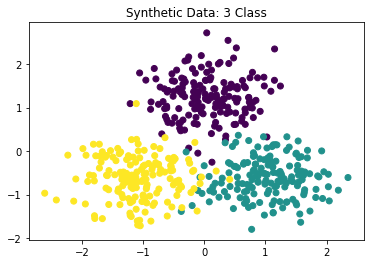

In [16]:
plt.scatter(x[:,0], x[:,1], c=cl)
plt.title('Synthetic Data: 3 Class')
plt.show()

**4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.**   
**5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.**

- _With momentum, the algorithm converges more efficiently. It has a lower loss after the same number of iterations, and appears to converge quickly._ 

In [17]:
def grad_descent_2(point, x, y,  iterations=10, learning_rate=1e-2):
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

In [18]:
def grad_descent_with_momentum_2(point, x, y, iterations=10, alpha=.9, epsilon=0.1):
    trajectory = [point]
    v = np.zeros(point.size)

    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad  = grad_f(point, x, y)
        v     = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    
    return (np.array(trajectory), losses)

In [19]:
np.random.seed(111)
point = np.random.uniform(-.1, .1, size=26).astype("float128")
traj, losses = grad_descent_2(point, x, y, iterations=1000, learning_rate=0.001)
traj_m, losses_m = grad_descent_with_momentum_2(point, x, y, iterations=1000, alpha=0.8, epsilon=0.001)

48.662087954441270433
35.311243403533550737


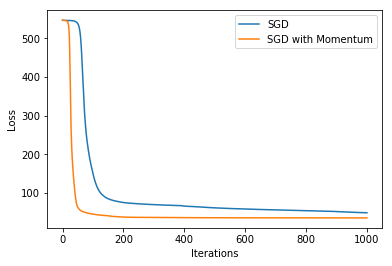

In [20]:
plt.plot(losses, label='SGD')
plt.plot(losses_m, label='SGD with Momentum')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

print(losses[-1])
print(losses_m[-1])